In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityaekap","key":"1610bc68994d31c01de296385f8cba9e"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d harishkumardatalab/medical-insurance-price-prediction

  0% 0.00/31.6k [00:00<?, ?B/s]
100% 31.6k/31.6k [00:00<00:00, 51.4MB/s]


In [4]:
!mkdir medical-insurance-price-prediction
!unzip medical-insurance-price-prediction.zip -d medical-insurance-price-prediction
!ls medical-insurance-price-prediction

Archive:  medical-insurance-price-prediction.zip
  inflating: medical-insurance-price-prediction/Medical_insurance.csv  
Medical_insurance.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder


In [6]:
df = pd.read_csv('/content/medical-insurance-price-prediction/Medical_insurance.csv')

# DATA UNDERSTANDING

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2772.0,39.109668,14.081459,18.0000,26.000,39.00000,51.0000,64.00000
bmi,2772.0,30.701349,6.129449,15.9600,26.220,30.44750,34.7700,53.13000
children,2772.0,1.101732,1.214806,0.0000,0.000,1.00000,2.0000,5.00000
charges,2772.0,13261.369959,12151.768945,1121.8739,4687.797,9333.01435,16577.7795,63770.42801


In [10]:
df.shape

(2772, 7)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: >

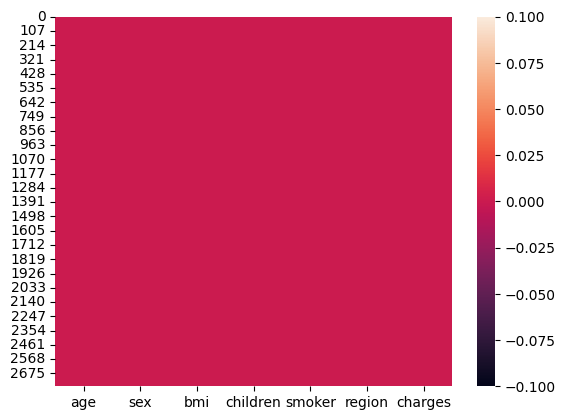

In [12]:
sns.heatmap(df.isnull())

In [13]:
# deteksi duplikasi data
df.duplicated().sum()

1435

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df['sex'].value_counts()

male      1406
female    1366
Name: sex, dtype: int64

In [16]:
df['smoker'].value_counts()

no     2208
yes     564
Name: smoker, dtype: int64

In [17]:
df['region'].value_counts()

southeast    766
southwest    684
northwest    664
northeast    658
Name: region, dtype: int64

# DATA PREPARATION

In [18]:
df = df.drop_duplicates() #menghapus duplikasi data
df.duplicated().sum() #cek duplikat

0

In [19]:
# Konversi Smoker
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Terapkan LabelEncoder pada kolom 'smoker' dan simpan dalam kolom baru 'smoker2'
df['smoker2'] = label_encoder.fit_transform(df['smoker'])
df.head()

<ipython-input-19-4c703f656182>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker2'] = label_encoder.fit_transform(df['smoker'])


,age,sex,bmi,children,smoker,region,charges,smoker2
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [20]:
# Konversi Gender
df['sex2'] = label_encoder.fit_transform(df['sex'])
df.head()

<ipython-input-20-b7bac265f125>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex2'] = label_encoder.fit_transform(df['sex'])


,age,sex,bmi,children,smoker,region,charges,smoker2,sex2
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [21]:
# Konversi region
df['region2'] = label_encoder.fit_transform(df['region'])
df.head()

<ipython-input-21-7c50793268de>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region2'] = label_encoder.fit_transform(df['region'])


,age,sex,bmi,children,smoker,region,charges,smoker2,sex2,region2
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1


<ipython-input-22-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

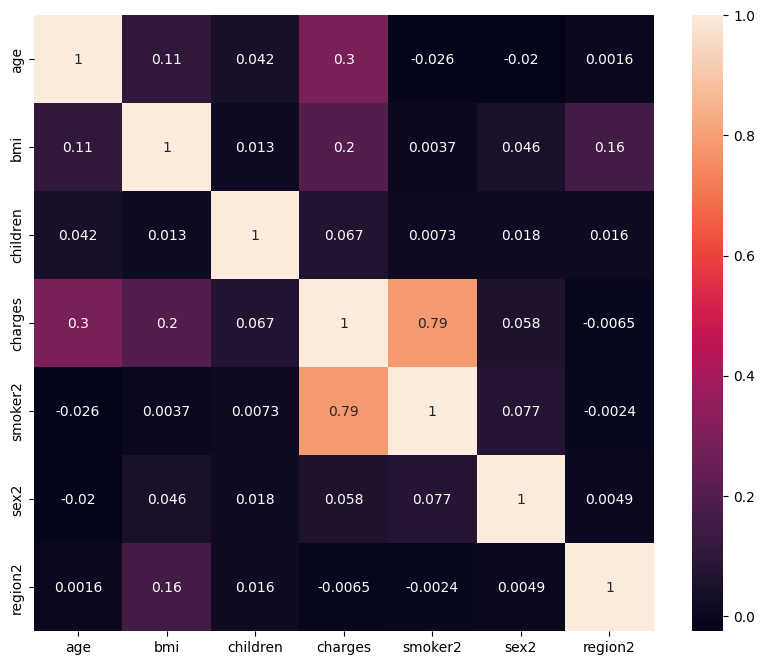

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

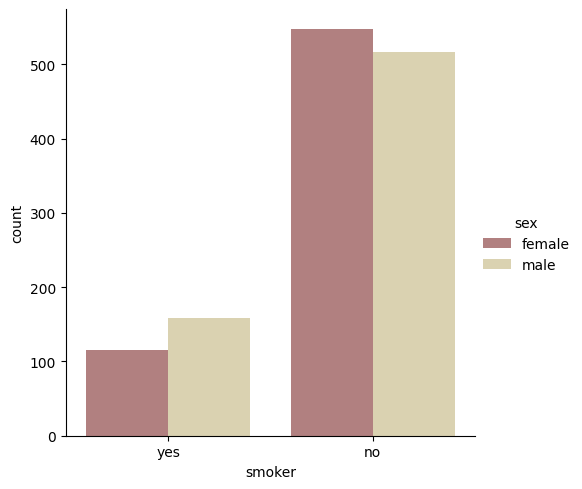

In [23]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

<ipython-input-24-3d2323ee6e97>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == "no")]["charges"],color='c',ax=ax)
<ipython-input-24-3d2323ee6e97>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == "yes")]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for smokers')

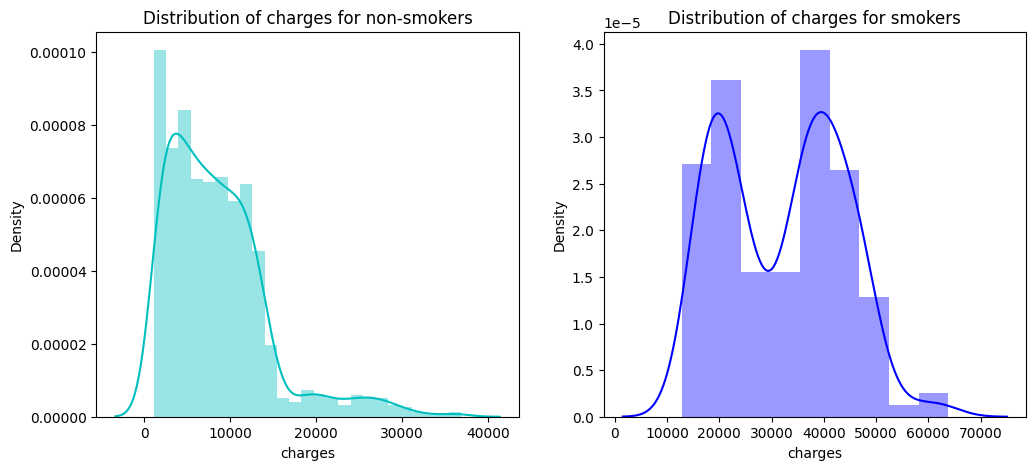

In [24]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == "no")]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == "yes")]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for smokers')

# MODELLING

In [25]:
features = ['age','sex2','bmi','children','smoker2','region2']
x = df[features]
y = df['charges']
x.shape, y.shape

((1337, 6), (1337,))

In [26]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(335,)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

In [28]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score*100,"%")

akurasi model regresi linier =  75.53782234810413 %


In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker2,sex2,region2
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,3
1,18,male,33.770,1,no,southeast,1725.55230,0,1,2
2,28,male,33.000,3,no,southeast,4449.46200,0,1,2
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1


In [30]:
# 'age','sex2','bmi','children','smoker2','region2'
input_data = np.array([[19,0,27.9,0,1,3]])

prediction = lr.predict(input_data)
print('Estimasi Biaya Medis dalam US Dolar :', prediction)

Estimasi Biaya Medis dalam US Dolar : [24777.5999909]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# save model

In [31]:
import pickle

filename = 'estimasi_medical.sav'
pickle.dump(lr,open(filename,'wb'))